<a href="https://colab.research.google.com/github/haoyangzheng-ai/HomPINN/blob/main/ICLR%20predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# make a copy before execute

In [ ]:
!wget https://raw.githubusercontent.com/jingyangcarl/openreview/refs/heads/main/venues/iclr/iclr2025.json
!wget https://raw.githubusercontent.com/jingyangcarl/openreview/refs/heads/main/venues/iclr/iclr2025.init.json

--2025-11-30 07:45:24--  https://raw.githubusercontent.com/jingyangcarl/openreview/refs/heads/main/venues/iclr/iclr2025.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62515536 (60M) [text/plain]
Saving to: ‘iclr2025.json.3’

iclr2025.json.3     100%[===================>]  59.62M  --.-KB/s    in 0.1s    

2025-11-30 07:45:24 (503 MB/s) - ‘iclr2025.json.3’ saved [62515536/62515536]

--2025-11-30 07:45:24--  https://raw.githubusercontent.com/jingyangcarl/openreview/refs/heads/main/venues/iclr/iclr2025.init.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awai

In [ ]:
import json
with open("iclr2025.init.json", "r") as f: # change this also to non-init to predict using final score or keep it as init for pre-rebuttal score
  data_init = json.load(f)

with open("iclr2025.json", "r") as f:
  data = json.load(f)

In [ ]:
targets = ['5;5;6;8'] # enter your scores here, or equivalent scores, replace 4 with 5, in increasing order

In [ ]:
data_init[0]["rating"]

'5;6;6;8'

In [ ]:
ids = [i["id"] for i in data_init if i["rating"] in targets]

In [ ]:
decisions = [i["status"] for i in data if i["id"] in ids]

(array([ 43.,   0.,  14.,   0.,   0., 169.,   0.,   5.,   0.,   4.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

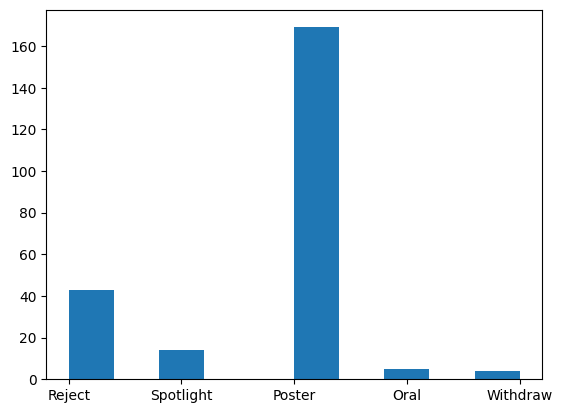

In [ ]:
import pylab
pylab.hist(decisions)

In [ ]:
import numpy as np
unique, counts = np.unique(decisions, return_counts=True)

In [ ]:
unique

array(['Oral', 'Poster', 'Reject', 'Spotlight', 'Withdraw'], dtype='<U9')

In [ ]:
1 - (int(counts[np.where(unique=="Reject")]) + counts[np.where(unique=="Withdraw")])/sum(counts)

/tmp/ipython-input-2816149018.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  1 - (int(counts[np.where(unique=="Reject")]) + counts[np.where(unique=="Withdraw")])/sum(counts)


array([0.8])

In [ ]:
# spotlight and oral chance
(counts[np.where(unique=="Spotlight")] + counts[np.where(unique=="Oral")])/sum(counts)

array([0.08085106])

In [ ]:
# check which paper they have rejected with same scores and you can learn from them
print("\n".join(list(["https://openreview.net/forum?id="+str(i) for i in np.array(ids)[np.where(np.array(decisions)=='Reject')]])))

https://openreview.net/forum?id=0Fi3u4RCyU
https://openreview.net/forum?id=1IeCqgULIM
https://openreview.net/forum?id=3Ofy2jNsNL
https://openreview.net/forum?id=3c4zQpIFNK
https://openreview.net/forum?id=618qfjvSt9
https://openreview.net/forum?id=7UKHNQIErp
https://openreview.net/forum?id=8kGonpsiHb
https://openreview.net/forum?id=8w8d8j2FCy
https://openreview.net/forum?id=C53FwQZigu
https://openreview.net/forum?id=D2as3jDmRA
https://openreview.net/forum?id=DyyLUUVXJ5
https://openreview.net/forum?id=DzKdjWe59v
https://openreview.net/forum?id=GYik1jT3gE
https://openreview.net/forum?id=INFfvQArFY
https://openreview.net/forum?id=IowRyVs862
https://openreview.net/forum?id=MW8DN8BE3g
https://openreview.net/forum?id=PPTE1DL4Li
https://openreview.net/forum?id=PbxKOPtoEE
https://openreview.net/forum?id=TX0OsLcaWf
https://openreview.net/forum?id=UmhC7fuhzs
https://openreview.net/forum?id=VT2R3UCcBL
https://openreview.net/forum?id=WQwy1rW60F
https://openreview.net/forum?id=XWaI6FLVgi
https://ope